In [2]:
import os
print(os.getcwd())

/content


In [3]:
import pandas as pd
df=pd.read_csv("POP.csv")

In [4]:
df.head(10)

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06
5,2019-12-06,157343.0,1952-06-01,2019-12-06
6,2019-12-06,157553.0,1952-07-01,2019-12-06
7,2019-12-06,157798.0,1952-08-01,2019-12-06
8,2019-12-06,158053.0,1952-09-01,2019-12-06
9,2019-12-06,158306.0,1952-10-01,2019-12-06


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
value,816.0,243847.767826,50519.140567,156309.0,201725.25,239557.5,289364.25,330309.946


In [6]:
df.isnull().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings(action= "ignore")

In [7]:
df.drop(['realtime_start','realtime_end'],axis=1,inplace=True)
df.head()

,value,date
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


In [9]:
df.dtypes


value    float64
date      object
dtype: object

In [10]:
df.rename(columns={'date': 'ds', 'value': 'y'}, inplace=True)
df.head(2)

,y,ds
0,156309.0,1952-01-01
1,156527.0,1952-02-01


In [11]:

df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')



In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

y     0
ds    0
dtype: int64

In [16]:
df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

In [14]:
df.columns

Index(['y', 'ds'], dtype='object')

In [ ]:
df['year']=df['ds'].dt.year
df['month']=df['ds'].dt.month
df['day']=df['ds'].dt.day

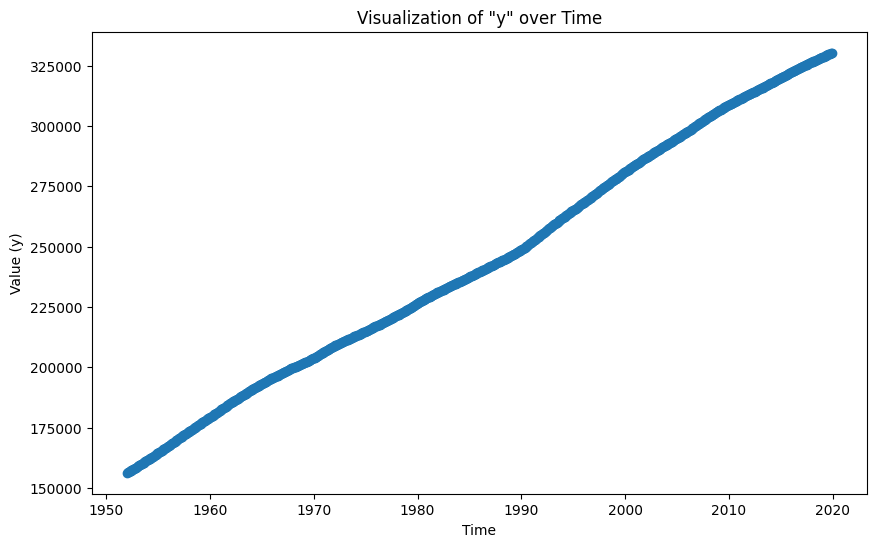

Correlation between 'y' and time: 0.9987722226457298


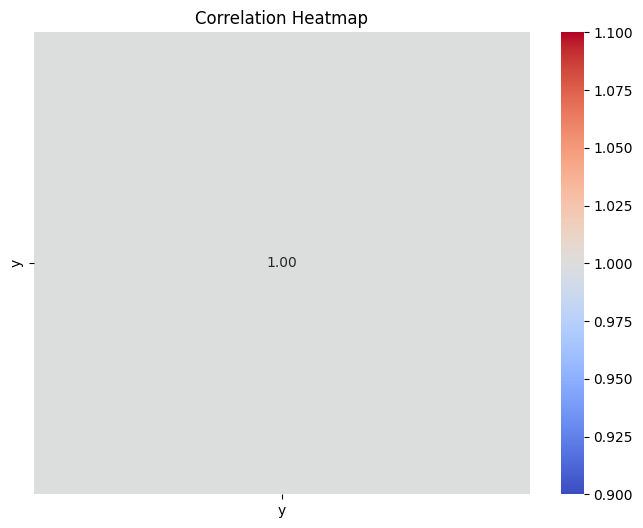

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], marker='o', linestyle='-')
plt.title('Visualization of "y" over Time')
plt.xlabel('Time')
plt.ylabel('Value (y)')
plt.show()

correlation = df['y'].corr(df['ds'].astype(int))
print(f"Correlation between 'y' and time: {correlation}")

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [19]:
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
import numpy as np
parameters = {
    "changepoint_prior_scale": [0.1, 0.2],
    "n_changepoints": [1, 5],
    "holidays_prior_scale": [0.1, 0.2],
    "seasonality_mode": ["multiplicative", "additive"],
    "yearly_seasonality": ["auto", True, False]
}

parameter_grid = ParameterGrid(parameters)

parameter_list = []
for p in parameter_grid:
    print(p)
    model = Prophet(
        changepoint_prior_scale=p["changepoint_prior_scale"],
        n_changepoints=p["n_changepoints"],
        holidays_prior_scale=p["holidays_prior_scale"],
        seasonality_mode=p["seasonality_mode"],
        yearly_seasonality=p["yearly_seasonality"],
        interval_width=0.95 )

    model.fit(df)
    future = model.make_future_dataframe(periods=100, freq="D")
    forecast = model.predict(future)

    predicted = forecast[["ds", "yhat"]]
    actual = df

    mpe = np.mean((predicted["yhat"] - actual["y"]) / actual["y"])
    print("MPE:", mpe)
    parameter_list.append([mpe, p])

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/foov_z0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/vt2kuisq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51415', 'data', 'file=/tmp/tmp9z4f2c6p/foov_z0s.json', 'init=/tmp/tmp9z4f2c6p/vt2kuisq.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelfyezdoam/prophet_model-20231125070838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

MPE: -5.7174307163500085e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/2mvixnv0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/uh97grs3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25685', 'data', 'file=/tmp/tmp9z4f2c6p/2mvixnv0.json', 'init=/tmp/tmp9z4f2c6p/uh97grs3.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model7nt1_f5n/prophet_model-20231125070839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.7174307163500085e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/r33e3e_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/6cdzhxvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92040', 'data', 'file=/tmp/tmp9z4f2c6p/r33e3e_s.json', 'init=/tmp/tmp9z4f2c6p/6cdzhxvd.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeluqdgrbaw/prophet_model-20231125070839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.545864711806262e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/spq44twg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/4c2qkvos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46156', 'data', 'file=/tmp/tmp9z4f2c6p/spq44twg.json', 'init=/tmp/tmp9z4f2c6p/4c2qkvos.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model011r9oh6/prophet_model-20231125070840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.581752065574069e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:08:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/qqgv787t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/8kcta9kn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17309', 'data', 'file=/tmp/tmp9z4f2c6p/qqgv787t.json', 'init=/tmp/tmp9z4f2c6p/8kcta9kn.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeldsrl6t8j/prophet_model-20231125070840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:41 - cmdstanpy - INFO - Chain [1] 

MPE: -5.581752065574069e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/25oipzrr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/8ej86nst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52587', 'data', 'file=/tmp/tmp9z4f2c6p/25oipzrr.json', 'init=/tmp/tmp9z4f2c6p/8ej86nst.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelhj6va1fo/prophet_model-20231125070841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.545864711806262e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


07:08:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/mlc5m_vr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/marc58u2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10735', 'data', 'file=/tmp/tmp9z4f2c6p/mlc5m_vr.json', 'init=/tmp/tmp9z4f2c6p/marc58u2.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeli6lsj3yg/prophet_model-20231125070842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 4.877786187687451e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


07:08:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/yg_k8vkc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/o8xn9azb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64951', 'data', 'file=/tmp/tmp9z4f2c6p/yg_k8vkc.json', 'init=/tmp/tmp9z4f2c6p/o8xn9azb.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model59082dj2/prophet_model-20231125070842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:43 - cmdstanpy - INFO - Chain [1] 

MPE: 4.877786187687451e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/xuu3oldq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/7ng07sw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26234', 'data', 'file=/tmp/tmp9z4f2c6p/xuu3oldq.json', 'init=/tmp/tmp9z4f2c6p/7ng07sw7.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeljow1vfdr/prophet_model-20231125070843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.434221317446052e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/mslbucv7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/bawwh3hh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35661', 'data', 'file=/tmp/tmp9z4f2c6p/mslbucv7.json', 'init=/tmp/tmp9z4f2c6p/bawwh3hh.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model0mj827ex/prophet_model-20231125070844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 6.0287118284004896e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:08:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/h2o7ha6a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/9cevsjq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95920', 'data', 'file=/tmp/tmp9z4f2c6p/h2o7ha6a.json', 'init=/tmp/tmp9z4f2c6p/9cevsjq9.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelbjaeay1m/prophet_model-20231125070844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:44 - cmdstanpy - INFO - Chain [1] 

MPE: 6.0287118284004896e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/zuw_73cd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/e2p54a2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86329', 'data', 'file=/tmp/tmp9z4f2c6p/zuw_73cd.json', 'init=/tmp/tmp9z4f2c6p/e2p54a2v.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelexjgc6jy/prophet_model-20231125070845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.434221317446052e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


07:08:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/96lu8rs4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/puso_1d9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36283', 'data', 'file=/tmp/tmp9z4f2c6p/96lu8rs4.json', 'init=/tmp/tmp9z4f2c6p/puso_1d9.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelc4trx4qt/prophet_model-20231125070846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.7174307163500085e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


07:08:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/mjny45yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/6unz2jre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54785', 'data', 'file=/tmp/tmp9z4f2c6p/mjny45yk.json', 'init=/tmp/tmp9z4f2c6p/6unz2jre.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelpa2c6lzb/prophet_model-20231125070846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:46 - cmdstanpy - INFO - Chain [1] 

MPE: -5.7174307163500085e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/0t3x8u73.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/uy_ucncq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72984', 'data', 'file=/tmp/tmp9z4f2c6p/0t3x8u73.json', 'init=/tmp/tmp9z4f2c6p/uy_ucncq.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelyc0txbfn/prophet_model-20231125070847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.545864711806262e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ht5zatg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/xoo6lpd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79224', 'data', 'file=/tmp/tmp9z4f2c6p/ht5zatg9.json', 'init=/tmp/tmp9z4f2c6p/xoo6lpd9.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelrg17fqzg/prophet_model-20231125070847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.581752065574069e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/uz_zdh5r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/2nssyzrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35258', 'data', 'file=/tmp/tmp9z4f2c6p/uz_zdh5r.json', 'init=/tmp/tmp9z4f2c6p/2nssyzrk.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelfwq3yvmu/prophet_model-20231125070848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:48 - cmdstanpy - INFO - Chain [1] 

MPE: -5.581752065574069e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/0uc6xgla.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/zmvnh58l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77811', 'data', 'file=/tmp/tmp9z4f2c6p/0uc6xgla.json', 'init=/tmp/tmp9z4f2c6p/zmvnh58l.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modellt4n1qy7/prophet_model-20231125070848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.545864711806262e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


07:08:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/d7uf5ogi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/jgveq7pf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19537', 'data', 'file=/tmp/tmp9z4f2c6p/d7uf5ogi.json', 'init=/tmp/tmp9z4f2c6p/jgveq7pf.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model8qkwotxz/prophet_model-20231125070849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 4.877786187687451e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


07:08:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/a8xadsv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/plxfs3hr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77632', 'data', 'file=/tmp/tmp9z4f2c6p/a8xadsv9.json', 'init=/tmp/tmp9z4f2c6p/plxfs3hr.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeln5cg41mf/prophet_model-20231125070849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:50 - cmdstanpy - INFO - Chain [1] 

MPE: 4.877786187687451e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/kzlrniax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ska2nn_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21870', 'data', 'file=/tmp/tmp9z4f2c6p/kzlrniax.json', 'init=/tmp/tmp9z4f2c6p/ska2nn_p.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model5__kj408/prophet_model-20231125070850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.434221317446052e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/_keqohkd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/4zg40__e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29200', 'data', 'file=/tmp/tmp9z4f2c6p/_keqohkd.json', 'init=/tmp/tmp9z4f2c6p/4zg40__e.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model7m3op2ui/prophet_model-20231125070850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 6.0287118284004896e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/rwu30evs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/chhawmah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93948', 'data', 'file=/tmp/tmp9z4f2c6p/rwu30evs.json', 'init=/tmp/tmp9z4f2c6p/chhawmah.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modellnbyv014/prophet_model-20231125070851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 6.0287118284004896e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/r2nzwpj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/q1a38bzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71870', 'data', 'file=/tmp/tmp9z4f2c6p/r2nzwpj0.json', 'init=/tmp/tmp9z4f2c6p/q1a38bzo.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelrvvopcdq/prophet_model-20231125070851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.434221317446052e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/qy4mdfs6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/tbwicoa8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20575', 'data', 'file=/tmp/tmp9z4f2c6p/qy4mdfs6.json', 'init=/tmp/tmp9z4f2c6p/tbwicoa8.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelpk4ckoxy/prophet_model-20231125070852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.6072099092356744e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/90zeyu12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/u1lr5hul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15876', 'data', 'file=/tmp/tmp9z4f2c6p/90zeyu12.json', 'init=/tmp/tmp9z4f2c6p/u1lr5hul.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model_wp1p4ro/prophet_model-20231125070852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.6072099092356744e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/lr2cjzpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/thyrbht3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5001', 'data', 'file=/tmp/tmp9z4f2c6p/lr2cjzpt.json', 'init=/tmp/tmp9z4f2c6p/thyrbht3.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelvyzvsbgj/prophet_model-20231125070853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.571104134668121e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/2rlh93gb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/jnz25sf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78450', 'data', 'file=/tmp/tmp9z4f2c6p/2rlh93gb.json', 'init=/tmp/tmp9z4f2c6p/jnz25sf_.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelt14wzc4p/prophet_model-20231125070853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.525417566676213e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/osh0edbs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wt_chgs3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86818', 'data', 'file=/tmp/tmp9z4f2c6p/osh0edbs.json', 'init=/tmp/tmp9z4f2c6p/wt_chgs3.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelfot95izx/prophet_model-20231125070853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.525417566676213e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/dxvcwu0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/0qe3rh7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50852', 'data', 'file=/tmp/tmp9z4f2c6p/dxvcwu0c.json', 'init=/tmp/tmp9z4f2c6p/0qe3rh7q.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelnp10qrvu/prophet_model-20231125070854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.571104134668121e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/6xd520b8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wh6sjphr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34670', 'data', 'file=/tmp/tmp9z4f2c6p/6xd520b8.json', 'init=/tmp/tmp9z4f2c6p/wh6sjphr.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model_qeq5min/prophet_model-20231125070854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.481082852918557e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/03bedntu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/66sh5ux6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50486', 'data', 'file=/tmp/tmp9z4f2c6p/03bedntu.json', 'init=/tmp/tmp9z4f2c6p/66sh5ux6.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelep92i82l/prophet_model-20231125070855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.481082852918557e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/u0y96yyk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ilg7a1_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95918', 'data', 'file=/tmp/tmp9z4f2c6p/u0y96yyk.json', 'init=/tmp/tmp9z4f2c6p/ilg7a1_o.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelq8wefjda/prophet_model-20231125070855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.612231300286949e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/lv6b8h6n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/f2sq62lr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68764', 'data', 'file=/tmp/tmp9z4f2c6p/lv6b8h6n.json', 'init=/tmp/tmp9z4f2c6p/f2sq62lr.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelito3zakk/prophet_model-20231125070856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 4.845691422396693e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:08:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/7a2z6kso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ujthtoh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31161', 'data', 'file=/tmp/tmp9z4f2c6p/7a2z6kso.json', 'init=/tmp/tmp9z4f2c6p/ujthtoh5.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model7qiwy6mo/prophet_model-20231125070856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:56 - cmdstanpy - INFO - Chain [1] 

MPE: 4.845691422396693e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/eouu8xnf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/p_khl1ox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81365', 'data', 'file=/tmp/tmp9z4f2c6p/eouu8xnf.json', 'init=/tmp/tmp9z4f2c6p/p_khl1ox.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelz9tdcb_c/prophet_model-20231125070857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.612231300286949e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/n4g5i0ng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/fx13p59m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40200', 'data', 'file=/tmp/tmp9z4f2c6p/n4g5i0ng.json', 'init=/tmp/tmp9z4f2c6p/fx13p59m.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeluib2ixxe/prophet_model-20231125070857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.6072099092356744e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/qatczcxd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/gjhwm8cw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24837', 'data', 'file=/tmp/tmp9z4f2c6p/qatczcxd.json', 'init=/tmp/tmp9z4f2c6p/gjhwm8cw.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_models122lu8s/prophet_model-20231125070857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.6072099092356744e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/nzv5mm55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/v63ugep6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68221', 'data', 'file=/tmp/tmp9z4f2c6p/nzv5mm55.json', 'init=/tmp/tmp9z4f2c6p/v63ugep6.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelwpgf3uxa/prophet_model-20231125070858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.571104134668121e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/q0pl3co4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/n5yo10ao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83613', 'data', 'file=/tmp/tmp9z4f2c6p/q0pl3co4.json', 'init=/tmp/tmp9z4f2c6p/n5yo10ao.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modela6nz_khp/prophet_model-20231125070858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.525417566676213e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/uie1uj_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/qnsmnxgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33500', 'data', 'file=/tmp/tmp9z4f2c6p/uie1uj_5.json', 'init=/tmp/tmp9z4f2c6p/qnsmnxgf.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model3ehe27u1/prophet_model-20231125070859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.525417566676213e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/soy26ty2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/pytc9f5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25835', 'data', 'file=/tmp/tmp9z4f2c6p/soy26ty2.json', 'init=/tmp/tmp9z4f2c6p/pytc9f5x.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelo_bldsu_/prophet_model-20231125070859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.571104134668121e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/axi_idhc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/sk8l05q3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24768', 'data', 'file=/tmp/tmp9z4f2c6p/axi_idhc.json', 'init=/tmp/tmp9z4f2c6p/sk8l05q3.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeljuuy9edg/prophet_model-20231125070900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.481082852918557e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


07:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/syzgdth9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/xqlg106v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56624', 'data', 'file=/tmp/tmp9z4f2c6p/syzgdth9.json', 'init=/tmp/tmp9z4f2c6p/xqlg106v.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelhnefv1jj/prophet_model-20231125070900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:00 - cmdstanpy - INFO - Chain [1] 

MPE: 5.481082852918557e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/y_6g46ip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/48btje3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20532', 'data', 'file=/tmp/tmp9z4f2c6p/y_6g46ip.json', 'init=/tmp/tmp9z4f2c6p/48btje3s.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeldvstc2b6/prophet_model-20231125070901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.612231300286949e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:09:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/iy81crms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/6mv8lvyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19109', 'data', 'file=/tmp/tmp9z4f2c6p/iy81crms.json', 'init=/tmp/tmp9z4f2c6p/6mv8lvyf.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelc_6r594f/prophet_model-20231125070902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 4.845691422396693e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:09:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wfkmzmbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/i0t9rmp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70816', 'data', 'file=/tmp/tmp9z4f2c6p/wfkmzmbn.json', 'init=/tmp/tmp9z4f2c6p/i0t9rmp8.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelqksf1eed/prophet_model-20231125070902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:02 - cmdstanpy - INFO - Chain [1] 

MPE: 4.845691422396693e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': False}
MPE: 5.612231300286949e-06


In [20]:
parameters_df=pd.DataFrame(parameter_list,columns=["MPE","P"])
parameters_df=parameters_df.sort_values(by="MPE")

In [21]:
print("Lowest MPE:",parameters_df.iloc[0,:][0])
print("Parameetrs:",parameters_df.iloc[0,:][1])

Lowest MPE: -5.7174307163500085e-05
Parameetrs: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


In [22]:
forecast_100_days = forecast.tail(100)
print(forecast_100_days)

            ds          trend     yhat_lower     yhat_upper    trend_lower  \
816 2019-12-02  331022.375130  329767.359214  332254.010336  331022.375130   
817 2019-12-03  331028.673179  329850.934826  332212.023912  331028.673179   
818 2019-12-04  331034.971228  329776.271255  332253.924904  331034.971228   
819 2019-12-05  331041.269277  329881.593462  332336.884712  331041.269277   
820 2019-12-06  331047.567326  329818.898443  332227.713182  331047.567326   
..         ...            ...            ...            ...            ...   
911 2020-03-06  331620.689785  330458.988752  332804.557524  331620.689785   
912 2020-03-07  331626.987834  330471.472339  332836.521006  331626.987834   
913 2020-03-08  331633.285883  330475.401927  332864.005735  331633.285883   
914 2020-03-09  331639.583932  330413.900413  332807.088906  331639.583932   
915 2020-03-10  331645.881981  330312.436764  332951.718533  331645.881981   

       trend_upper  additive_terms  additive_terms_lower  \
816

In [23]:
best_params = parameters_df.iloc[0,:][1]
model = Prophet(changepoint_prior_scale=best_params["changepoint_prior_scale"],
                n_changepoints=best_params["n_changepoints"],
                holidays_prior_scale=best_params["holidays_prior_scale"],
                seasonality_mode=best_params["seasonality_mode"],
                yearly_seasonality=best_params["yearly_seasonality"],
                interval_width=0.95)
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/74cbvy3j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/i4or3e21.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13419', 'data', 'file=/tmp/tmp9z4f2c6p/74cbvy3j.json', 'init=/tmp/tmp9z4f2c6p/i4or3e21.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelfmqq9h_5/prophet_model-20231125071011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future = model.make_future_dataframe(periods=100, freq='D')
forecast = model.predict(future)
forecast_100_days = forecast.tail(100)

In [25]:
print(forecast_100_days)

            ds          trend     yhat_lower     yhat_upper    trend_lower  \
816 2019-12-02  333259.609123  328761.951855  338272.491356  333259.609123   
817 2019-12-03  333267.244571  328688.728916  337766.760356  333267.244571   
818 2019-12-04  333274.880020  328771.948655  338298.228273  333274.880020   
819 2019-12-05  333282.515469  329490.511861  339052.472297  333282.515469   
820 2019-12-06  333290.150918  329439.528789  338844.399471  333290.150918   
..         ...            ...            ...            ...            ...   
911 2020-03-06  333984.976755  329555.865772  339045.537774  333984.976755   
912 2020-03-07  333992.612204  329662.533302  338787.696427  333992.612204   
913 2020-03-08  334000.247652  329734.170052  338895.883470  334000.247652   
914 2020-03-09  334007.883101  329609.744508  339175.927778  334007.883101   
915 2020-03-10  334015.518550  329810.805146  338977.509862  334015.518550   

       trend_upper  multiplicative_terms  multiplicative_terms_

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/7_j21v25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/oh8q9ywl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69892', 'data', 'file=/tmp/tmp9z4f2c6p/7_j21v25.json', 'init=/tmp/tmp9z4f2c6p/oh8q9ywl.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelwn4xu5u2/prophet_model-20231125071947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/j9gcbv2t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/3lu40u9v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40831', 'data', 'file=/tmp/tmp9z4f2c6p/j9gcbv2t.json', 'init=/tmp/tmp9z4f2c6p/3lu40u9v.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelxuvg0nz_/prophet_model-20231125071948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.7174307163500085e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/2gylj1ti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/5cpj2bhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87921', 'data', 'file=/tmp/tmp9z4f2c6p/2gylj1ti.json', 'init=/tmp/tmp9z4f2c6p/5cpj2bhy.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelcz4_zww2/prophet_model-20231125071949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.7174307163500085e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/oai86f3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/fjs82zx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96407', 'data', 'file=/tmp/tmp9z4f2c6p/oai86f3t.json', 'init=/tmp/tmp9z4f2c6p/fjs82zx4.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelboqsdtbr/prophet_model-20231125071949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.545864711806262e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/r9_yxee8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wr3pd0bo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1241', 'data', 'file=/tmp/tmp9z4f2c6p/r9_yxee8.json', 'init=/tmp/tmp9z4f2c6p/wr3pd0bo.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model7urc4vnh/prophet_model-20231125071950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.581752065574069e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:19:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/y0bznucp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/q38sxg5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72032', 'data', 'file=/tmp/tmp9z4f2c6p/y0bznucp.json', 'init=/tmp/tmp9z4f2c6p/q38sxg5_.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelhjni0tog/prophet_model-20231125071950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:50 - cmdstanpy - INFO - Chain [1] 

MPE: -5.581752065574069e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/8hn46hde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/s5fy9_9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19627', 'data', 'file=/tmp/tmp9z4f2c6p/8hn46hde.json', 'init=/tmp/tmp9z4f2c6p/s5fy9_9i.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelz88cy51b/prophet_model-20231125071951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.545864711806262e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


07:19:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/w_pcpid4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/mwao3_da.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53704', 'data', 'file=/tmp/tmp9z4f2c6p/w_pcpid4.json', 'init=/tmp/tmp9z4f2c6p/mwao3_da.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_models2it67vg/prophet_model-20231125071952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 4.877786187687451e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


07:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/kb73o46y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/nwqqecv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39621', 'data', 'file=/tmp/tmp9z4f2c6p/kb73o46y.json', 'init=/tmp/tmp9z4f2c6p/nwqqecv4.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model74spwmh8/prophet_model-20231125071952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:52 - cmdstanpy - INFO - Chain [1] 

MPE: 4.877786187687451e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ud5gvps8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/myz5m05z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32887', 'data', 'file=/tmp/tmp9z4f2c6p/ud5gvps8.json', 'init=/tmp/tmp9z4f2c6p/myz5m05z.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelks1w9tfj/prophet_model-20231125071953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.434221317446052e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/uc5z48_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/528oluzl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97818', 'data', 'file=/tmp/tmp9z4f2c6p/uc5z48_1.json', 'init=/tmp/tmp9z4f2c6p/528oluzl.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model52heqi01/prophet_model-20231125071953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 6.0287118284004896e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:19:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/qchi1ke7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ld48ov08.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49192', 'data', 'file=/tmp/tmp9z4f2c6p/qchi1ke7.json', 'init=/tmp/tmp9z4f2c6p/ld48ov08.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelus67xrw1/prophet_model-20231125071954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:54 - cmdstanpy - INFO - Chain [1] 

MPE: 6.0287118284004896e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/2gkiojwb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/h7e7nud0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7378', 'data', 'file=/tmp/tmp9z4f2c6p/2gkiojwb.json', 'init=/tmp/tmp9z4f2c6p/h7e7nud0.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model67curbd2/prophet_model-20231125071955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.434221317446052e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


07:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ngg5xrox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/sxsc81ed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16750', 'data', 'file=/tmp/tmp9z4f2c6p/ngg5xrox.json', 'init=/tmp/tmp9z4f2c6p/sxsc81ed.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model8qf18nj2/prophet_model-20231125071955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.7174307163500085e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


07:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ddn6rwu5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/xu7cu14x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23275', 'data', 'file=/tmp/tmp9z4f2c6p/ddn6rwu5.json', 'init=/tmp/tmp9z4f2c6p/xu7cu14x.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelgf8j2wiz/prophet_model-20231125071956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:56 - cmdstanpy - INFO - Chain [1] 

MPE: -5.7174307163500085e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/7q63p6ej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/od3sfpno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73200', 'data', 'file=/tmp/tmp9z4f2c6p/7q63p6ej.json', 'init=/tmp/tmp9z4f2c6p/od3sfpno.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelgf2e2_46/prophet_model-20231125071957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.545864711806262e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/7byazni8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/uacje6a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45689', 'data', 'file=/tmp/tmp9z4f2c6p/7byazni8.json', 'init=/tmp/tmp9z4f2c6p/uacje6a3.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelqs97x8hr/prophet_model-20231125071957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.581752065574069e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/onw1jhd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/xkk0yfk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75084', 'data', 'file=/tmp/tmp9z4f2c6p/onw1jhd5.json', 'init=/tmp/tmp9z4f2c6p/xkk0yfk0.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model42zlpbqe/prophet_model-20231125071958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:58 - cmdstanpy - INFO - Chain [1] 

MPE: -5.581752065574069e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/kaw7k6_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/cd27lfty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68335', 'data', 'file=/tmp/tmp9z4f2c6p/kaw7k6_1.json', 'init=/tmp/tmp9z4f2c6p/cd27lfty.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model8yjyskvo/prophet_model-20231125071958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.545864711806262e-05
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/3f1f7kj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/rvmysfdo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76394', 'data', 'file=/tmp/tmp9z4f2c6p/3f1f7kj0.json', 'init=/tmp/tmp9z4f2c6p/rvmysfdo.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelm9hnc6gr/prophet_model-20231125071959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 4.877786187687451e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/z7ink925.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/jj9djim2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14899', 'data', 'file=/tmp/tmp9z4f2c6p/z7ink925.json', 'init=/tmp/tmp9z4f2c6p/jj9djim2.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model60l6fyku/prophet_model-20231125071959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 4.877786187687451e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/brwhv815.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wtt5uqcf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23485', 'data', 'file=/tmp/tmp9z4f2c6p/brwhv815.json', 'init=/tmp/tmp9z4f2c6p/wtt5uqcf.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelexeg0787/prophet_model-20231125072000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.434221317446052e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/736on9iz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/kcg6ollc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42932', 'data', 'file=/tmp/tmp9z4f2c6p/736on9iz.json', 'init=/tmp/tmp9z4f2c6p/kcg6ollc.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelgm7zb8fg/prophet_model-20231125072000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 6.0287118284004896e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/gcdguz0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/bbskgh8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71956', 'data', 'file=/tmp/tmp9z4f2c6p/gcdguz0y.json', 'init=/tmp/tmp9z4f2c6p/bbskgh8p.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeljd1eeicu/prophet_model-20231125072001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 6.0287118284004896e-06
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/v9c2hn5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/vylmnhh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91096', 'data', 'file=/tmp/tmp9z4f2c6p/v9c2hn5b.json', 'init=/tmp/tmp9z4f2c6p/vylmnhh4.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelhdjxfhtk/prophet_model-20231125072001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.434221317446052e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/b5dslzq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/uodll693.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52138', 'data', 'file=/tmp/tmp9z4f2c6p/b5dslzq4.json', 'init=/tmp/tmp9z4f2c6p/uodll693.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeld_cszss1/prophet_model-20231125072001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.6072099092356744e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/kzylwxxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/irq9pzos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6687', 'data', 'file=/tmp/tmp9z4f2c6p/kzylwxxa.json', 'init=/tmp/tmp9z4f2c6p/irq9pzos.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeltlxfhf9p/prophet_model-20231125072002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.6072099092356744e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/gphiiftm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/glhujway.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55655', 'data', 'file=/tmp/tmp9z4f2c6p/gphiiftm.json', 'init=/tmp/tmp9z4f2c6p/glhujway.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelqzvjus0u/prophet_model-20231125072002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.571104134668121e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ggsjvtff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/g31m9dbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=564', 'data', 'file=/tmp/tmp9z4f2c6p/ggsjvtff.json', 'init=/tmp/tmp9z4f2c6p/g31m9dbz.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model1kdko6s6/prophet_model-20231125072003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.525417566676213e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/0f3ubtjs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/61m8gm_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97848', 'data', 'file=/tmp/tmp9z4f2c6p/0f3ubtjs.json', 'init=/tmp/tmp9z4f2c6p/61m8gm_0.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelwsnkp_4z/prophet_model-20231125072003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.525417566676213e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ah9aluk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/umuci4pc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95597', 'data', 'file=/tmp/tmp9z4f2c6p/ah9aluk0.json', 'init=/tmp/tmp9z4f2c6p/umuci4pc.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modellmdryer_/prophet_model-20231125072003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.571104134668121e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/xnzucp6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/6wf_8wsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76004', 'data', 'file=/tmp/tmp9z4f2c6p/xnzucp6b.json', 'init=/tmp/tmp9z4f2c6p/6wf_8wsh.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model67s5tu7n/prophet_model-20231125072004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.481082852918557e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/f7z3h2jx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wqoi3lgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42271', 'data', 'file=/tmp/tmp9z4f2c6p/f7z3h2jx.json', 'init=/tmp/tmp9z4f2c6p/wqoi3lgt.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelaufvwt1d/prophet_model-20231125072004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.481082852918557e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ywaddsdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/k0bkto35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30336', 'data', 'file=/tmp/tmp9z4f2c6p/ywaddsdr.json', 'init=/tmp/tmp9z4f2c6p/k0bkto35.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelh4t5gs3s/prophet_model-20231125072005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.612231300286949e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:20:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/z15hc3f7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/q504mn5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13187', 'data', 'file=/tmp/tmp9z4f2c6p/z15hc3f7.json', 'init=/tmp/tmp9z4f2c6p/q504mn5k.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model5ahnj3cy/prophet_model-20231125072005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:05 - cmdstanpy - INFO - Chain [1] 

MPE: 4.845691422396693e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/mho9azfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/dxru7r2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95504', 'data', 'file=/tmp/tmp9z4f2c6p/mho9azfc.json', 'init=/tmp/tmp9z4f2c6p/dxru7r2_.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelkqw163jb/prophet_model-20231125072006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 4.845691422396693e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wwtlk61a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/_s1w2bwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58990', 'data', 'file=/tmp/tmp9z4f2c6p/wwtlk61a.json', 'init=/tmp/tmp9z4f2c6p/_s1w2bwg.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelwk5ei67s/prophet_model-20231125072006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.612231300286949e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/x4e__hov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/r8us12zk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62722', 'data', 'file=/tmp/tmp9z4f2c6p/x4e__hov.json', 'init=/tmp/tmp9z4f2c6p/r8us12zk.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modellq55nxn5/prophet_model-20231125072007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.6072099092356744e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/qmg_snkn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ffszao6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55992', 'data', 'file=/tmp/tmp9z4f2c6p/qmg_snkn.json', 'init=/tmp/tmp9z4f2c6p/ffszao6f.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model7swn0yr7/prophet_model-20231125072007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.6072099092356744e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/59n18t99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/8di_6rib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54618', 'data', 'file=/tmp/tmp9z4f2c6p/59n18t99.json', 'init=/tmp/tmp9z4f2c6p/8di_6rib.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelv4qzxrsm/prophet_model-20231125072007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: -5.571104134668121e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wwsyi3zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/7nkmvuzj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80412', 'data', 'file=/tmp/tmp9z4f2c6p/wwsyi3zw.json', 'init=/tmp/tmp9z4f2c6p/7nkmvuzj.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeljt920lkm/prophet_model-20231125072008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.525417566676213e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:20:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/4frjzqum.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/n_8cib56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57924', 'data', 'file=/tmp/tmp9z4f2c6p/4frjzqum.json', 'init=/tmp/tmp9z4f2c6p/n_8cib56.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modele6d2e0e8/prophet_model-20231125072009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:09 - cmdstanpy - INFO - Chain [1] 

MPE: -5.525417566676213e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/fo133zpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/33vlb6xm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8350', 'data', 'file=/tmp/tmp9z4f2c6p/fo133zpp.json', 'init=/tmp/tmp9z4f2c6p/33vlb6xm.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelti7uotgi/prophet_model-20231125072009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: -5.571104134668121e-05
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': 'auto'}


07:20:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/13zmnqtf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/k5xdxadn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24000', 'data', 'file=/tmp/tmp9z4f2c6p/13zmnqtf.json', 'init=/tmp/tmp9z4f2c6p/k5xdxadn.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model2njvtbv4/prophet_model-20231125072010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.481082852918557e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}


07:20:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/yycb1abm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/13ifndnq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52358', 'data', 'file=/tmp/tmp9z4f2c6p/yycb1abm.json', 'init=/tmp/tmp9z4f2c6p/13ifndnq.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modeli9s0qqs7/prophet_model-20231125072010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:11 - cmdstanpy - INFO - Chain [1] 

MPE: 5.481082852918557e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/wgtdzev0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/y6cb5jw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79252', 'data', 'file=/tmp/tmp9z4f2c6p/wgtdzev0.json', 'init=/tmp/tmp9z4f2c6p/y6cb5jw1.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelt4ewycw5/prophet_model-20231125072011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 5.612231300286949e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': 'auto'}


07:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/pfr1vtjx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/88zklbl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65794', 'data', 'file=/tmp/tmp9z4f2c6p/pfr1vtjx.json', 'init=/tmp/tmp9z4f2c6p/88zklbl7.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_model2m2jgz7_/prophet_model-20231125072012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MPE: 4.845691422396693e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': True}


07:20:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/ha9ir93r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/eavdpmbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35824', 'data', 'file=/tmp/tmp9z4f2c6p/ha9ir93r.json', 'init=/tmp/tmp9z4f2c6p/eavdpmbd.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelk6uy3yth/prophet_model-20231125072012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:13 - cmdstanpy - INFO - Chain [1] 

MPE: 4.845691422396693e-06
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive', 'yearly_seasonality': False}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/_z6u9216.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9z4f2c6p/y_0j4ixd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60102', 'data', 'file=/tmp/tmp9z4f2c6p/_z6u9216.json', 'init=/tmp/tmp9z4f2c6p/y_0j4ixd.json', 'output', 'file=/tmp/tmp9z4f2c6p/prophet_modelo9qbu65i/prophet_model-20231125072013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE: 5.612231300286949e-06


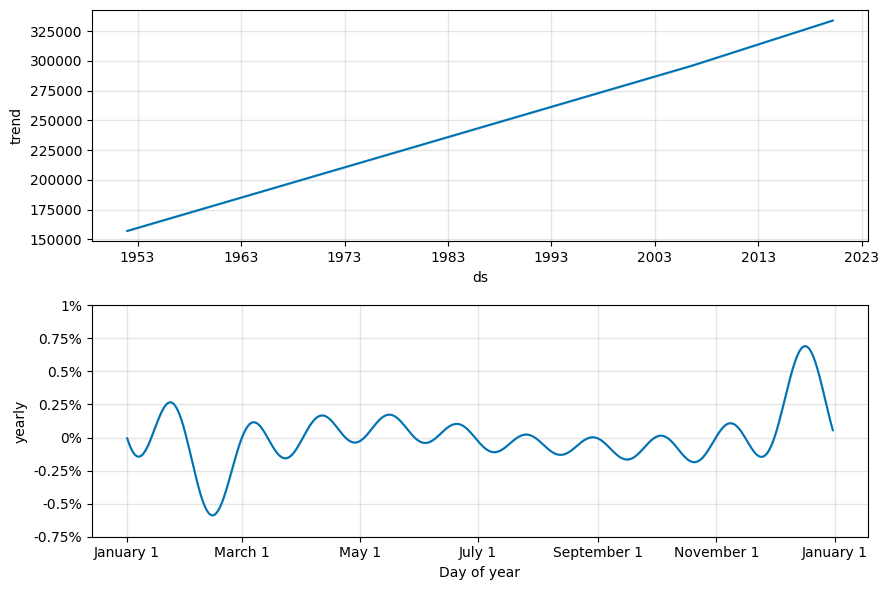

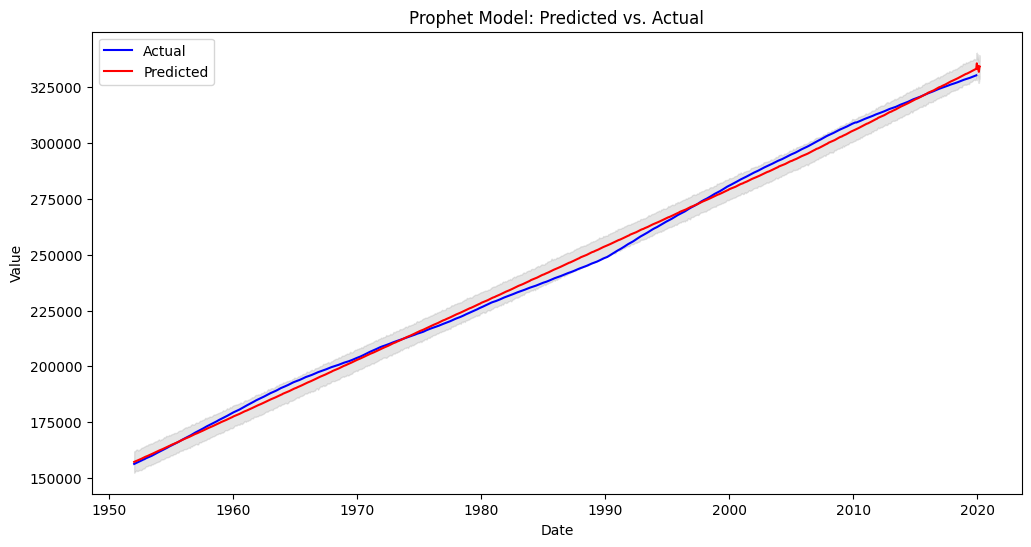

In [29]:
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



parameters = {
    "changepoint_prior_scale": [0.1, 0.2],
    "n_changepoints": [1, 5],
    "holidays_prior_scale": [0.1, 0.2],
    "seasonality_mode": ["multiplicative", "additive"],
    "yearly_seasonality": ["auto", True, False]
}

parameter_grid = ParameterGrid(parameters)

parameter_list = []

for p in parameter_grid:
    print(p)
    model = Prophet(
        changepoint_prior_scale=p["changepoint_prior_scale"],
        n_changepoints=p["n_changepoints"],
        holidays_prior_scale=p["holidays_prior_scale"],
        seasonality_mode=p["seasonality_mode"],
        yearly_seasonality=p["yearly_seasonality"],
        interval_width=0.95
    )

    model.fit(df)
    future = model.make_future_dataframe(periods=100, freq="D")
    forecast = model.predict(future)

    predicted = forecast[["ds", "yhat"]]
    actual = df

    mpe = np.mean((predicted["yhat"] - actual["y"]) / actual["y"])
    print("MPE:", mpe)
    parameter_list.append([mpe, p])

best_params = min(parameter_list, key=lambda x: x[0])[1]

best_model = Prophet(
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    n_changepoints=best_params["n_changepoints"],
    holidays_prior_scale=best_params["holidays_prior_scale"],
    seasonality_mode=best_params["seasonality_mode"],
    yearly_seasonality=best_params["yearly_seasonality"],
    interval_width=0.95
)

best_model.fit(df)
future = best_model.make_future_dataframe(periods=100, freq="D")
best_forecast = best_model.predict(future)

# Visualize components of the Prophet model
best_model.plot_components(best_forecast)
plt.show()

# Visualize predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(actual['ds'], actual['y'], label='Actual', color='blue')
plt.plot(best_forecast['ds'], best_forecast['yhat'], label='Predicted', color='red')
plt.fill_between(best_forecast['ds'], best_forecast['yhat_lower'], best_forecast['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model: Predicted vs. Actual')
plt.legend()
plt.show()
